# Titanic: Machine Learning from Disaster

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix

### EDA and Data Cleaning

In [2]:
titanic_df = pd.read_csv('data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
# Data cleaning
titanic_df['Sex'] = titanic_df['Sex'] == 'male'
titanic_df['Sex'] = titanic_df['Sex']*1.0
titanic_df['Mr'] = titanic_df['Name'].str.contains('Mr')
titanic_df['Mr'] = titanic_df['Mr']*1.0

In [6]:
# Removing seemingly unrelated variables
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)

In [7]:
# Looking at missing data
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Mr               0
dtype: int64

Seems like age is missing a few values, perhaps median imputation is best for this.

In [8]:
age_mean = titanic_df['Age'].median()
titanic_df['Age'].fillna(age_mean,inplace=True)

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Mr
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.726150
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.446183
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Mr'], dtype=object)

Scatter Matrix


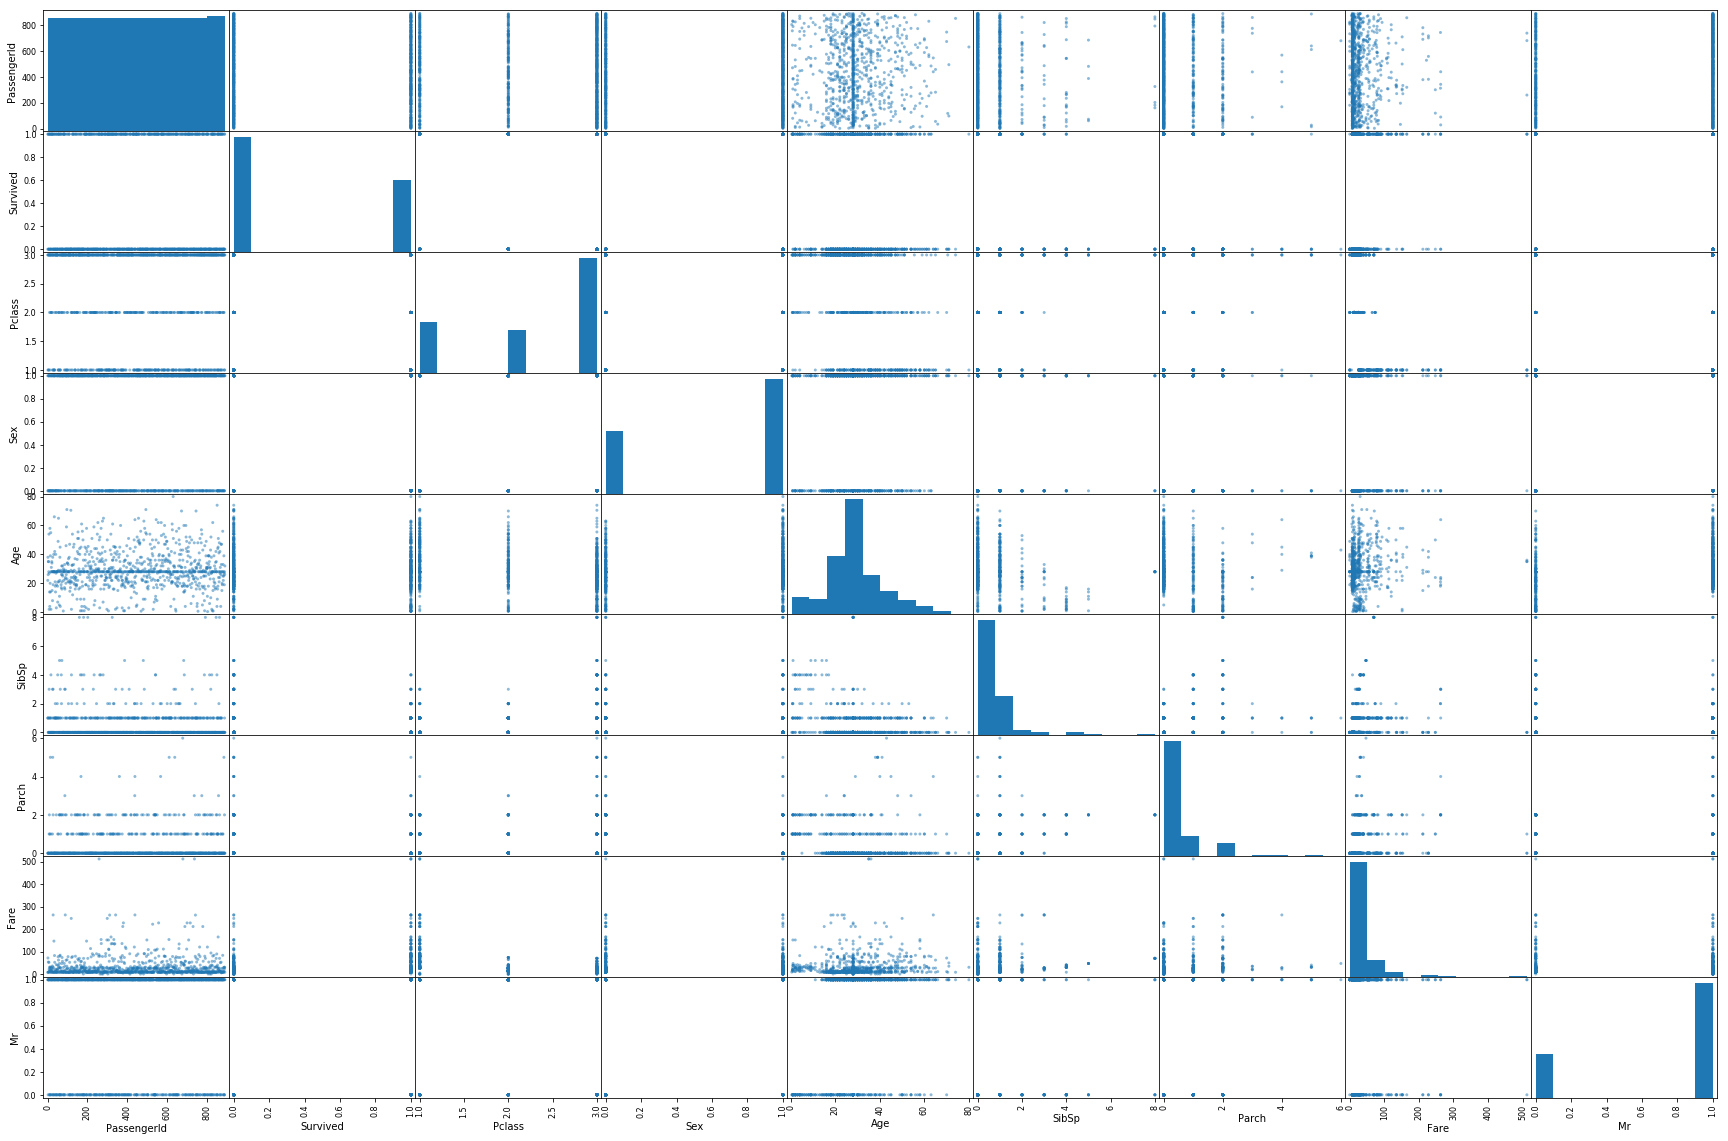

In [11]:
scatter_matrix(titanic_df, figsize=(30,20))
print('Scatter Matrix')

### Fitting a basic Logistic Regression Model

In [12]:
train_y = titanic_df['Survived']
# picking seemingly important variables here
train_X = titanic_df[['Pclass', 'Sex', 'Age', 'Fare', 'Mr']]
clf = LogisticRegression(solver='lbfgs').fit(train_X, train_y)
score = clf.score(train_X, train_y)
print(score)

0.792368125701459


79% accuracy. Not too bad.

In [13]:
# A quick sanity check
preds_ones = np.ones(len(train_y))
print(np.sum(train_y - preds_ones == 0)/len(train_y))

preds_zeros = np.zeros(len(train_y))
print(np.sum(train_y - preds_zeros == 0)/len(train_y))

preds_men = titanic_df['Sex']
print(np.sum(train_y - preds_men == 0)/len(train_y))

preds_men = 1-titanic_df['Sex']
print(np.sum(train_y - preds_men == 0)/len(train_y))

0.3838383838383838
0.6161616161616161
0.2132435465768799
0.7867564534231201


We're doing better than predicting all 1s or all 0s. Suprisingly, we're only slightly better than predicting all women survived and all men died!!

### Improving the Model

In [14]:
def improve_predictors(df):
    new_df = df.copy()
    important_features = ['Sex', 'Pclass', 'Age', 'Fare', 'Mr']
    
    # Standardizing variables
    for feature in important_features:
        new_df[feature] = (new_df[feature]-new_df[feature].mean())/new_df[feature].std()
        
    # Adding quadratic features
    for degree in range(2,3):
        for feature in important_features:
            new_df[feature + '^' + str(degree)] = new_df[feature]**degree
            
    # Adding interaction terms
    for feature in important_features:
        for f in important_features:
            if feature != f:
                new_df[feature + '*' + f] = new_df[feature]*new_df[f]
        
    return new_df

In [15]:
new_X = improve_predictors(train_X)
new_X.describe()

,Pclass,Sex,Age,Fare,Mr,Sex^2,Pclass^2,Age^2,Fare^2,Mr^2,...,Age*Fare,Age*Mr,Fare*Sex,Fare*Pclass,Fare*Age,Fare*Mr,Mr*Sex,Mr*Pclass,Mr*Age,Mr*Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,-7.575933e-17,-1.315820e-16,2.232906e-16,-1.196200e-17,-5.582266e-17,0.998878,0.998878,0.998878,0.998878,0.998878,...,0.096580,0.335117,-0.182128,-0.548883,0.096580,-0.120092,0.521044,0.028006,0.335117,-0.120092
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.617532,0.848305,1.725755,5.929990,1.013711,...,0.896580,1.104070,1.075680,1.377591,0.896580,1.122703,1.026462,1.010196,1.104070,1.122703
min,-1.565228e+00,-1.354813e+00,-2.222908e+00,-6.480577e-01,-1.627471e+00,0.543583,0.136277,0.000771,0.000006,0.376702,...,-5.246396,-5.079831,-13.089847,-15.122825,-5.246396,-15.724206,-1.199904,-1.345777,-5.079831,-15.724206
25%,-3.691575e-01,-1.354813e+00,-5.654189e-01,-4.888737e-01,-1.627471e+00,0.543583,0.683785,0.010937,0.085738,0.376702,...,-0.098956,-0.158468,-0.361457,-0.410253,-0.098956,-0.300232,0.452514,-0.960675,-0.158468,-0.300232
50%,8.269128e-01,7.372810e-01,-1.045787e-01,-3.571902e-01,6.137605e-01,0.543583,0.683785,0.259972,0.224429,0.376702,...,0.050130,0.030096,-0.247833,-0.382519,0.050130,-0.198902,0.452514,0.507526,0.030096,-0.198902
75%,8.269128e-01,7.372810e-01,4.330683e-01,-2.423274e-02,6.137605e-01,1.835517,0.683785,1.053208,0.244148,2.648663,...,0.241720,0.690068,0.284591,0.046089,0.241720,0.254712,0.452514,0.507526,0.690068,0.254712
max,8.269128e-01,7.372810e-01,3.889370e+00,9.661740e+00,6.137605e-01,1.835517,2.449938,15.127199,93.349222,2.648663,...,12.356233,3.617719,7.123418,1.014358,12.356233,5.929994,2.204919,2.547364,3.617719,5.929994


In [16]:
new_model = LogisticRegression(solver='lbfgs').fit(new_X, train_y)
score = new_model.score(new_X, train_y)
print(score)

0.8125701459034792


### Generating test set predictions

In [17]:
test_df = pd.read_csv('data/test.csv')

# Converting sex to numeric
test_df['Sex'] = test_df['Sex'] == 'male'
test_df['Sex'] = test_df['Sex']*1.0

# Creating a title Mr. since some royal males may survive, whereas the Mr. may not
test_df['Mr'] = test_df['Name'].str.contains('Mr')
test_df['Mr'] = test_df['Mr']*1.0

# Dropping columns
test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)

# Imputing means
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

# Creating test_X
test_X = test_df[['Pclass', 'Sex', 'Age', 'Fare', 'Mr']]
test_X = improve_predictors(test_X)

In [18]:
# Predicting data
test_df['Prediction'] = new_model.predict(test_X)

In [19]:
# Writing to file
test_df_submit = test_df[['PassengerId', 'Prediction']]
test_df_submit = test_df_submit.rename(columns={'Prediction':'Survived'})
test_df_submit.to_csv('data/submission.csv', index=False)

### Score: 0.77511